In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as st
from scipy.stats import linregress
import numpy as np


In [2]:
songs_path = "spotify_songs.csv"
song_data = pd.read_csv(songs_path)
song_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
date_filtered_df = song_data.loc[song_data["track_album_release_date"].str.len() > 9]
date_filtered_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:


count = date_filtered_df.info()
count

<class 'pandas.core.frame.DataFrame'>
Index: 30947 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  30947 non-null  object 
 1   track_name                30942 non-null  object 
 2   track_artist              30942 non-null  object 
 3   track_popularity          30947 non-null  int64  
 4   track_album_id            30947 non-null  object 
 5   track_album_name          30942 non-null  object 
 6   track_album_release_date  30947 non-null  object 
 7   playlist_name             30947 non-null  object 
 8   playlist_id               30947 non-null  object 
 9   playlist_genre            30947 non-null  object 
 10  playlist_subgenre         30947 non-null  object 
 11  danceability              30947 non-null  float64
 12  energy                    30947 non-null  float64
 13  key                       30947 non-null  int64  
 14  loudness   

In [5]:
cleaned_song_data = date_filtered_df.dropna()
cleaned_song_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30942 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  30942 non-null  object 
 1   track_name                30942 non-null  object 
 2   track_artist              30942 non-null  object 
 3   track_popularity          30942 non-null  int64  
 4   track_album_id            30942 non-null  object 
 5   track_album_name          30942 non-null  object 
 6   track_album_release_date  30942 non-null  object 
 7   playlist_name             30942 non-null  object 
 8   playlist_id               30942 non-null  object 
 9   playlist_genre            30942 non-null  object 
 10  playlist_subgenre         30942 non-null  object 
 11  danceability              30942 non-null  float64
 12  energy                    30942 non-null  float64
 13  key                       30942 non-null  int64  
 14  loudness   

In [6]:
cleaned_song_data['track_album_release_date'] = pd.to_datetime(cleaned_song_data['track_album_release_date'])
cleaned_song_data = cleaned_song_data.loc[(cleaned_song_data["track_album_release_date"] >= "2010-01-01") & (cleaned_song_data["track_album_release_date"] < "2020-01-01")]


/var/folders/g4/k0s4bmd917jd9q25xxsgxh_m0000gn/T/ipykernel_26088/4254487217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_song_data['track_album_release_date'] = pd.to_datetime(cleaned_song_data['track_album_release_date'])


In [7]:
cleaned_song_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22980 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  22980 non-null  object        
 1   track_name                22980 non-null  object        
 2   track_artist              22980 non-null  object        
 3   track_popularity          22980 non-null  int64         
 4   track_album_id            22980 non-null  object        
 5   track_album_name          22980 non-null  object        
 6   track_album_release_date  22980 non-null  datetime64[ns]
 7   playlist_name             22980 non-null  object        
 8   playlist_id               22980 non-null  object        
 9   playlist_genre            22980 non-null  object        
 10  playlist_subgenre         22980 non-null  object        
 11  danceability              22980 non-null  float64       
 12  energy                 

In [8]:
cleaned_song_data['track_name'].value_counts()

track_name
Paradise                  18
Dance Monkey              18
Breathe                   16
Señorita                  15
Alive                     15
                          ..
Não Demora                 1
Ai Droga                   1
Divisor de Águas           1
Preto Todo de Ouro         1
Typhoon - Original Mix     1
Name: count, Length: 16867, dtype: int64

In [9]:
cleaned_song_data['track_id'].nunique()


19624

In [10]:
cleaned_track_data = cleaned_song_data.drop_duplicates(subset =['track_id'])
cleaned_trackid_data = cleaned_song_data.drop_duplicates(subset=['track_name', 'track_artist'], keep = False)
cleaned_trackid_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
10,3eFJI470ALf1EYjywPRsJy,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-6.500,1,0.1810,0.1460,0.000005,0.1240,0.752,121.984,207894
12,6e0CvGZf7CouOpYF8toXHC,Body On My,Loud Luxury,67,2R66I0nzp3NnuUlzIGWQ5P,Body On My,2019-03-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.675,1,0.0463,0.0399,0.000000,0.3740,0.687,121.985,192507


In [12]:

cleaned_trackid_data.info()
file_path = "cleaned_trackid_data.csv"
cleaned_trackid_data.to_csv(file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 16046 entries, 3 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  16046 non-null  object        
 1   track_name                16046 non-null  object        
 2   track_artist              16046 non-null  object        
 3   track_popularity          16046 non-null  int64         
 4   track_album_id            16046 non-null  object        
 5   track_album_name          16046 non-null  object        
 6   track_album_release_date  16046 non-null  datetime64[ns]
 7   playlist_name             16046 non-null  object        
 8   playlist_id               16046 non-null  object        
 9   playlist_genre            16046 non-null  object        
 10  playlist_subgenre         16046 non-null  object        
 11  danceability              16046 non-null  float64       
 12  energy                 

In [13]:
cleaned_trackid_data['playlist_name'].value_counts()

playlist_name
Indie Poptimism                             249
Hard Rock Workout                           152
Urban Contemporary                          110
Tropical Vibes                              108
House Electro 2019                          100
                                           ... 
90s-2000s Southern Hip Hop / Crunk            1
This Is Guns N' Roses                         1
Classic Rock Radio                            1
The Sound of New Jack Swing                   1
New Jack Swing - 90s R&B fused w Hip Hop      1
Name: count, Length: 428, dtype: int64

In [14]:
cleaned_trackid_data['playlist_name'].nunique()

428

In [15]:
cleaned_trackid_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
10,3eFJI470ALf1EYjywPRsJy,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-6.500,1,0.1810,0.1460,0.000005,0.1240,0.752,121.984,207894
12,6e0CvGZf7CouOpYF8toXHC,Body On My,Loud Luxury,67,2R66I0nzp3NnuUlzIGWQ5P,Body On My,2019-03-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.675,1,0.0463,0.0399,0.000000,0.3740,0.687,121.985,192507


In [22]:
keys = cleaned_trackid_data["key"].value_counts()
keys

key
1     1963
0     1707
7     1601
11    1475
9     1418
2     1369
6     1303
5     1302
8     1252
10    1131
4     1036
3      489
Name: count, dtype: int64

In [25]:
keys_df = pd.DataFrame(keys).sort_index().reset_index().replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          ["C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"])
keys_df

,key,count
0,C,1707
1,C♯/D♭,1963
2,D,1369
3,D♯/E♭,489
4,E,1036
5,F,1302
6,F♯/G♭,1303
7,G,1601
8,G♯/A♭,1252
9,A,1418


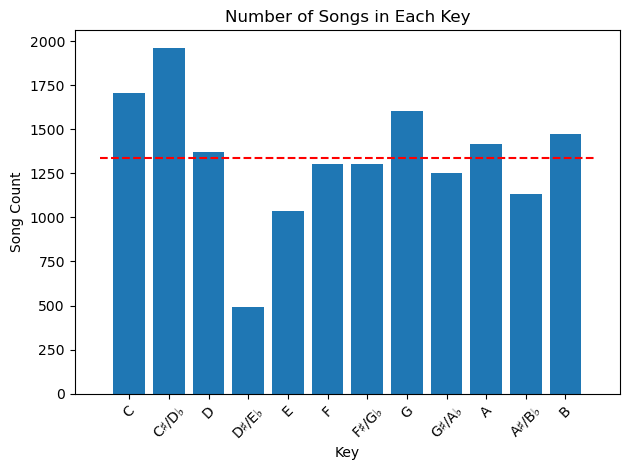

In [43]:
plt.bar(x = keys_df["key"],
        height = keys_df["count"])
plt.xlabel("Key")
plt.ylabel("Song Count")
plt.title("Number of Songs in Each Key")
plt.xticks(rotation = 45)
plt.hlines(y = keys_df["count"].mean(),
           xmin = -0.75,
           xmax = (len(keys_df["key"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

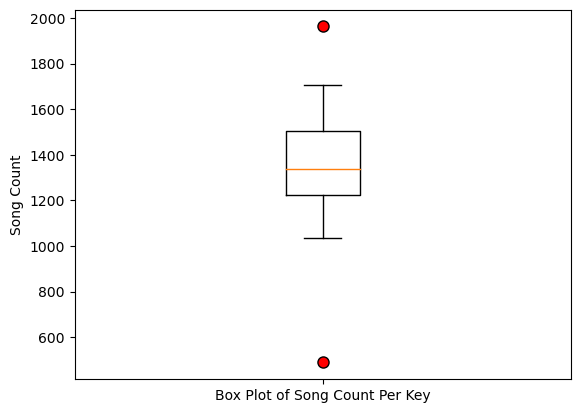

In [91]:
label = ["Box Plot of Song Count Per Key"]
plt.boxplot(x = keys_df["count"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Song Count")
plt.show()

In [60]:
# Creating dataframes for all C♯/D♭ songs and D♯/E♭ songs
c_sharp_db = cleaned_trackid_data.loc[cleaned_trackid_data["key"] == 1].reset_index(drop = True)
d_sharp_db = cleaned_trackid_data.loc[cleaned_trackid_data["key"] == 3].reset_index(drop = True)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2tilX6FUl0IwFgiOYjuc6V,Unlove You,Armin van Buuren,62,6k63cIUizpLu0h5hhIg8LG,Unlove You,2019-10-18,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3,-3.660,0,0.0597,0.0303,0.000033,0.1430,0.663,116.892,150160
1,3Lv3frZVXU7Q0JEFvLIzWW,Promises (with Sam Smith) - David Guetta Remix,Calvin Harris,63,7g15PlMnaKmFMUsSpR8aZt,Promises (with Sam Smith) [Remixes],2018-10-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3,-4.744,0,0.0372,0.1860,0.000219,0.1030,0.225,125.157,190417
2,6wKJjrWWP4qpzYbE8oQkc4,All Star - Breathe Carolina Remix,Smash Mouth,60,5lsHOl5P5mWLHeslZCLSaQ,All Star (Breathe Carolina Remix),2019-08-23,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,3,-5.877,0,0.0385,0.0324,0.000000,0.1060,0.751,115.018,217043
3,3M9Apu4OZfylLTFKvgEtKa,Ritual,Tiësto,82,0efvl0HsK2xxttk4IVOJry,Ritual,2019-05-31,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,3,-4.389,0,0.0552,0.1570,0.000000,0.0844,0.767,114.996,198996
4,2aXA9aQfrqaOi1Wy3NfSZI,One Life,Mike Perry,64,2GlcDrDfKOtb2EQPFFGISo,One Life,2019-09-27,Dance Room,37i9dQZF1DX2ENAPP1Tyed,pop,...,3,-3.642,1,0.0555,0.0997,0.000000,0.2420,0.233,128.015,204591


In [66]:
c_sharp_genres = c_sharp_db["playlist_genre"].value_counts()
c_sharp_genres_df = pd.DataFrame(c_sharp_genres).sort_index().reset_index()
c_sharp_genres_df

,playlist_genre,count
0,edm,462
1,latin,297
2,pop,301
3,r&b,281
4,rap,534
5,rock,88


In [67]:
d_sharp_genres = d_sharp_db["playlist_genre"].value_counts()
d_sharp_genres_df = pd.DataFrame(d_sharp_genres).sort_index().reset_index()
d_sharp_genres_df

,playlist_genre,count
0,edm,121
1,latin,74
2,pop,98
3,r&b,76
4,rap,88
5,rock,32


In [69]:
all_genre_counts = cleaned_trackid_data["playlist_genre"].value_counts()
all_genre_counts_df = pd.DataFrame(all_genre_counts).sort_index().reset_index()
all_genre_counts_df = all_genre_counts_df.rename(columns = {"count": "all_keys_count"})
all_genre_counts_df

,playlist_genre,all_keys_count
0,edm,3875
1,latin,2592
2,pop,2835
3,r&b,2283
4,rap,3303
5,rock,1158


In [70]:
# Merging dataframes to include all_keys_count
c_sharp_genres_df = pd.merge(c_sharp_genres_df,
                             all_genre_counts_df,
                             how = "left",
                             on = ["playlist_genre", "playlist_genre"])
c_sharp_genres_df

,playlist_genre,count,all_keys_count
0,edm,462,3875
1,latin,297,2592
2,pop,301,2835
3,r&b,281,2283
4,rap,534,3303
5,rock,88,1158


In [71]:
d_sharp_genres_df = pd.merge(d_sharp_genres_df,
                             all_genre_counts_df,
                             how = "left",
                             on = ["playlist_genre", "playlist_genre"])
d_sharp_genres_df

,playlist_genre,count,all_keys_count
0,edm,121,3875
1,latin,74,2592
2,pop,98,2835
3,r&b,76,2283
4,rap,88,3303
5,rock,32,1158


In [74]:
# Calculating percent count for each
c_sharp_genres_df["percent"] = 100 * c_sharp_genres_df["count"] / c_sharp_genres_df["all_keys_count"]
c_sharp_genres_df

,playlist_genre,count,all_keys_count,percent
0,edm,462,3875,11.922581
1,latin,297,2592,11.458333
2,pop,301,2835,10.617284
3,r&b,281,2283,12.308366
4,rap,534,3303,16.167121
5,rock,88,1158,7.599309


In [75]:
d_sharp_genres_df["percent"] = 100 * d_sharp_genres_df["count"] / d_sharp_genres_df["all_keys_count"]
d_sharp_genres_df

,playlist_genre,count,all_keys_count,percent
0,edm,121,3875,3.122581
1,latin,74,2592,2.854938
2,pop,98,2835,3.456790
3,r&b,76,2283,3.328953
4,rap,88,3303,2.664245
5,rock,32,1158,2.763385


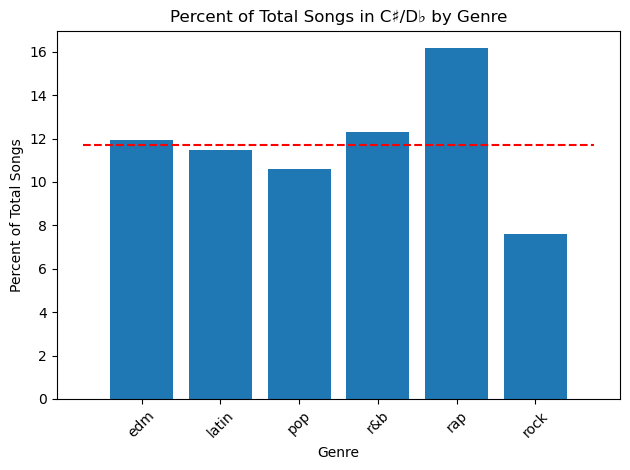

In [87]:
plt.bar(x = c_sharp_genres_df["playlist_genre"],
        height = c_sharp_genres_df["percent"])
plt.xlabel("Genre")
plt.ylabel("Percent of Total Songs")
plt.title("Percent of Total Songs in C♯/D♭ by Genre")
plt.xticks(rotation = 45)
plt.hlines(y = c_sharp_genres_df["percent"].mean(),
           xmin = -0.75,
           xmax = (len(c_sharp_genres_df["percent"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

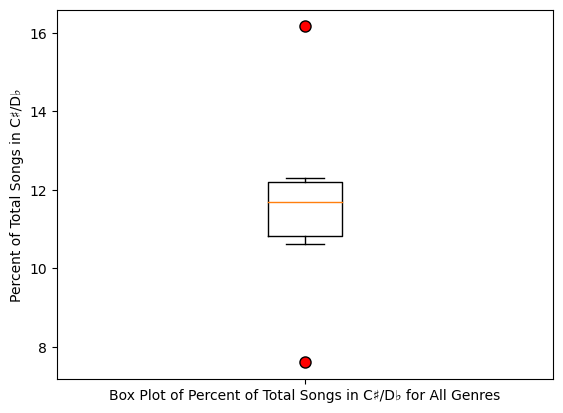

In [90]:
label = ["Box Plot of Percent of Total Songs in C♯/D♭ for All Genres"]
plt.boxplot(x = c_sharp_genres_df["percent"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Percent of Total Songs in C♯/D♭")
plt.show()

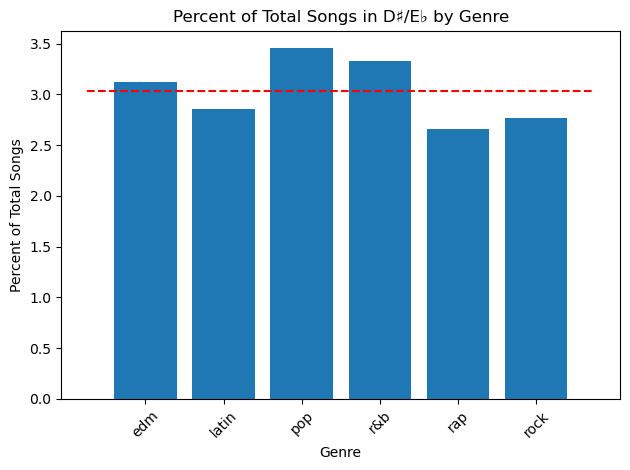

In [88]:
plt.bar(x = d_sharp_genres_df["playlist_genre"],
        height = d_sharp_genres_df["percent"])
plt.xlabel("Genre")
plt.ylabel("Percent of Total Songs")
plt.title("Percent of Total Songs in D♯/E♭ by Genre")
plt.xticks(rotation = 45)
plt.hlines(y = d_sharp_genres_df["percent"].mean(),
           xmin = -0.75,
           xmax = (len(d_sharp_genres_df["percent"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

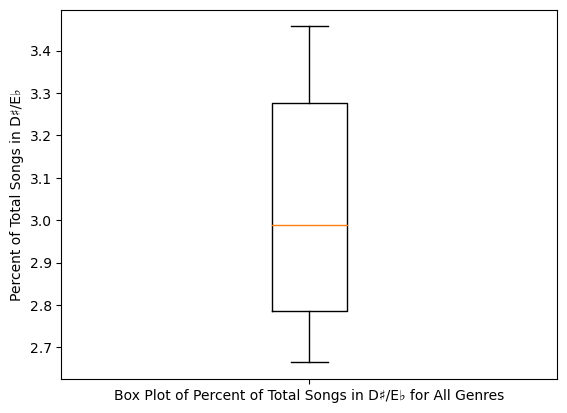

In [93]:
label = ["Box Plot of Percent of Total Songs in D♯/E♭ for All Genres"]
plt.boxplot(x = d_sharp_genres_df["percent"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Percent of Total Songs in D♯/E♭")
plt.show()

In [94]:
songs_2010_df = cleaned_trackid_data.loc[(cleaned_trackid_data["track_album_release_date"] >= "2010-01-01") & (cleaned_trackid_data["track_album_release_date"] < "2011-01-01")]
songs_2010_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
712,2g2N78BH9x4iAzeSvjG7dU,All I Want For Christmas Is You,Mariah Carey,18,63OsyEW79JFEVI8k4Abuo6,Merry Christmas II You,2010-01-01,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,9,-4.538,0,0.0586,0.07590,0.000000,0.1270,0.449,150.031,242347
776,0kwENjv9F98MZLPEN3gCQT,Gonna Make You Sweat (Everybody Dance Now),C & C Music Factory,2,3DFnN7SaYffZ6BrSmIhtkR,100 Hits of the '90s,2010-02-26,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-9.134,1,0.0952,0.00217,0.446000,0.1940,0.796,112.815,243800
780,12DVGoYMPBebItALnmaNdT,Pump Up the Jam,Technotronic,38,1k1nZFZj8nOI5Yugc6hQs6,Winners Greatest Hits Vol.2,2010-11-16,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,10,-8.866,0,0.0822,0.01640,0.000002,0.0460,0.673,124.821,214576
783,1vuz46T61qINYeGeN93AKZ,Life - Radio Edit,Des'ree,27,1suw2wSUQSR9ZJxL2xkh3e,Essential - The 90s,2010-09-10,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,1,-5.846,1,0.0427,0.19200,0.000006,0.1100,0.661,104.814,189987
803,5Jcv891JICGnMkkP7Lr3Ju,Cotton Eye Joe,Rednex,5,3DFnN7SaYffZ6BrSmIhtkR,100 Hits of the '90s,2010-02-26,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,9,-7.788,0,0.0668,0.01240,0.002060,0.0338,0.614,131.994,193827


In [95]:
keys_2010 = songs_2010_df["key"].value_counts()
keys_2010

key
1     51
2     41
9     39
0     39
7     38
11    38
6     33
4     32
10    29
5     26
8     24
3     15
Name: count, dtype: int64

In [96]:
keys_2010_df = pd.DataFrame(keys_2010).sort_index().reset_index().replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          ["C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"])
keys_2010_df

,key,count
0,C,39
1,C♯/D♭,51
2,D,41
3,D♯/E♭,15
4,E,32
5,F,26
6,F♯/G♭,33
7,G,38
8,G♯/A♭,24
9,A,39


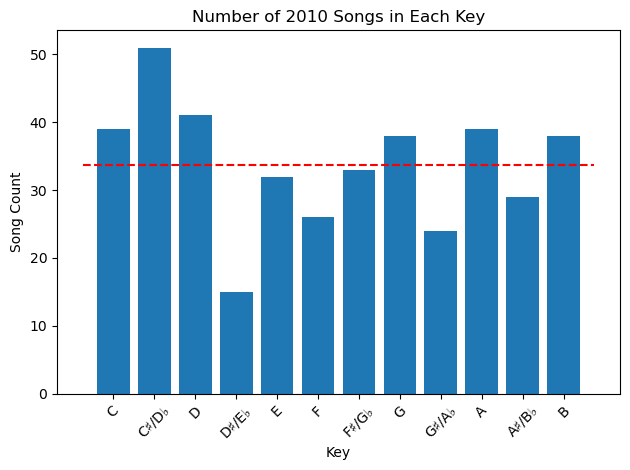

In [97]:
plt.bar(x = keys_2010_df["key"],
        height = keys_2010_df["count"])
plt.xlabel("Key")
plt.ylabel("Song Count")
plt.title("Number of 2010 Songs in Each Key")
plt.xticks(rotation = 45)
plt.hlines(y = keys_2010_df["count"].mean(),
           xmin = -0.75,
           xmax = (len(keys_2010_df["key"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

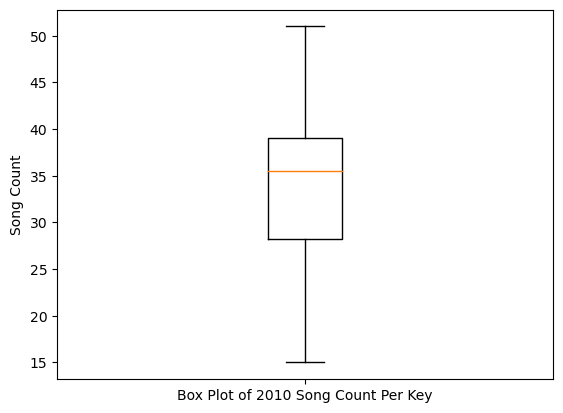

In [98]:
label = ["Box Plot of 2010 Song Count Per Key"]
plt.boxplot(x = keys_2010_df["count"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Song Count")
plt.show()

In [99]:
songs_2019_df = cleaned_trackid_data.loc[(cleaned_trackid_data["track_album_release_date"] >= "2019-01-01") & (cleaned_trackid_data["track_album_release_date"] < "2020-01-01")]
keys_2019 = songs_2019_df["key"].value_counts()
keys_2019_df = pd.DataFrame(keys_2019).sort_index().reset_index().replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          ["C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"])
keys_2019_df

,key,count
0,C,646
1,C♯/D♭,795
2,D,518
3,D♯/E♭,186
4,E,395
5,F,509
6,F♯/G♭,489
7,G,594
8,G♯/A♭,522
9,A,519


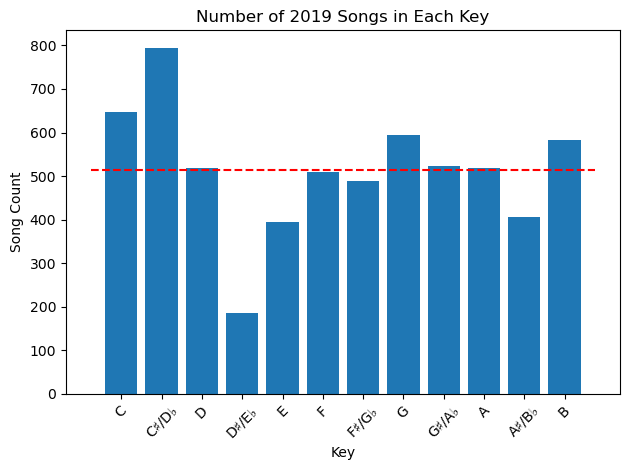

In [100]:
plt.bar(x = keys_2019_df["key"],
        height = keys_2019_df["count"])
plt.xlabel("Key")
plt.ylabel("Song Count")
plt.title("Number of 2019 Songs in Each Key")
plt.xticks(rotation = 45)
plt.hlines(y = keys_2019_df["count"].mean(),
           xmin = -0.75,
           xmax = (len(keys_2019_df["key"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

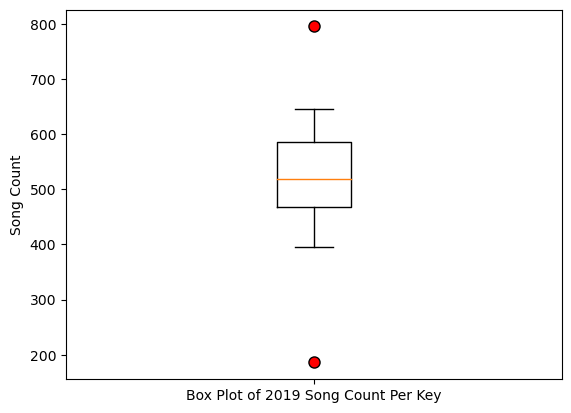

In [101]:
label = ["Box Plot of 2019 Song Count Per Key"]
plt.boxplot(x = keys_2019_df["count"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Song Count")
plt.show()

In [102]:
songs_mid_2014_2015_df = cleaned_trackid_data.loc[(cleaned_trackid_data["track_album_release_date"] >= "2014-07-01") & (cleaned_trackid_data["track_album_release_date"] < "2015-07-01")]
keys_mid_2014_2015 = songs_mid_2014_2015_df["key"].value_counts()
keys_mid_2014_2015_df = pd.DataFrame(keys_mid_2014_2015).sort_index().reset_index().replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          ["C", "C♯/D♭", "D", "D♯/E♭", "E", "F", "F♯/G♭", "G", "G♯/A♭", "A", "A♯/B♭", "B"])
keys_mid_2014_2015_df

,key,count
0,C,121
1,C♯/D♭,117
2,D,90
3,D♯/E♭,26
4,E,63
5,F,86
6,F♯/G♭,82
7,G,121
8,G♯/A♭,71
9,A,113


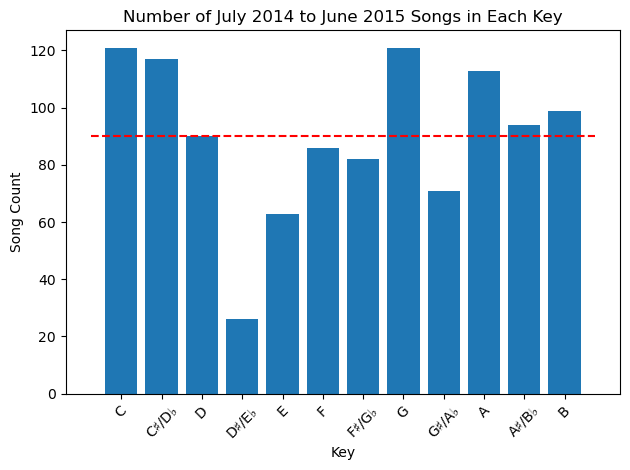

In [103]:
plt.bar(x = keys_mid_2014_2015_df["key"],
        height = keys_mid_2014_2015_df["count"])
plt.xlabel("Key")
plt.ylabel("Song Count")
plt.title("Number of July 2014 to June 2015 Songs in Each Key")
plt.xticks(rotation = 45)
plt.hlines(y = keys_mid_2014_2015_df["count"].mean(),
           xmin = -0.75,
           xmax = (len(keys_mid_2014_2015_df["key"]) - 0.25),
           color = "r",
           linestyle = "--")
plt.tight_layout()
plt.show()

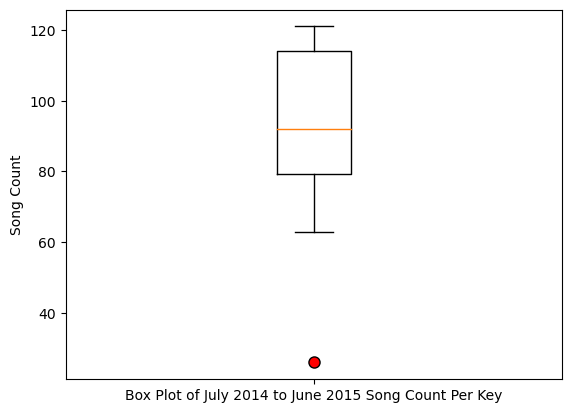

In [104]:
label = ["Box Plot of July 2014 to June 2015 Song Count Per Key"]
plt.boxplot(x = keys_mid_2014_2015_df["count"],
            labels = label,
            flierprops = {"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Song Count")
plt.show()